In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import scipy.stats as stats
%matplotlib inline

In [14]:
pd.set_option('display.max_rows', None)
arrests = pd.read_csv("Pittsburgh Police Arrest Data.csv", usecols=['INCIDENTNEIGHBORHOOD', 'OFFENSES'])

hoods = arrests.groupby('INCIDENTNEIGHBORHOOD').count()
hoods_ordered = hoods['OFFENSES'].sort_values(ascending=False)
hoods_ordered

INCIDENTNEIGHBORHOOD
Central Business District      3313
South Side Flats               2840
Carrick                        1959
East Allegheny                 1769
Homewood South                 1740
Homewood North                 1639
East Liberty                   1531
Marshall-Shadeland             1252
Bluff                          1219
Mount Washington               1187
Knoxville                      1118
Hazelwood                      1115
Brookline                      1108
Sheraden                       1063
Lincoln-Lemington-Belmar       1057
Beechview                      1029
Allegheny Center               1014
East Hills                      951
Brighton Heights                920
Perry South                     892
Bloomfield                      836
Shadyside                       812
Allentown                       801
Middle Hill                     788
Fineview                        727
Central North Side              716
Larimer                         706
Crawfor

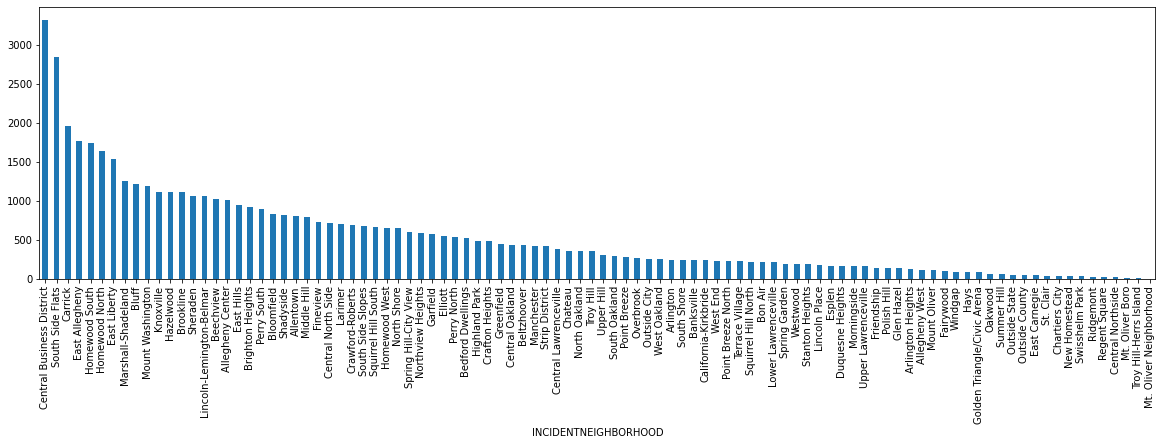

In [15]:
hoods_ordered.plot.bar(figsize = (20,5))

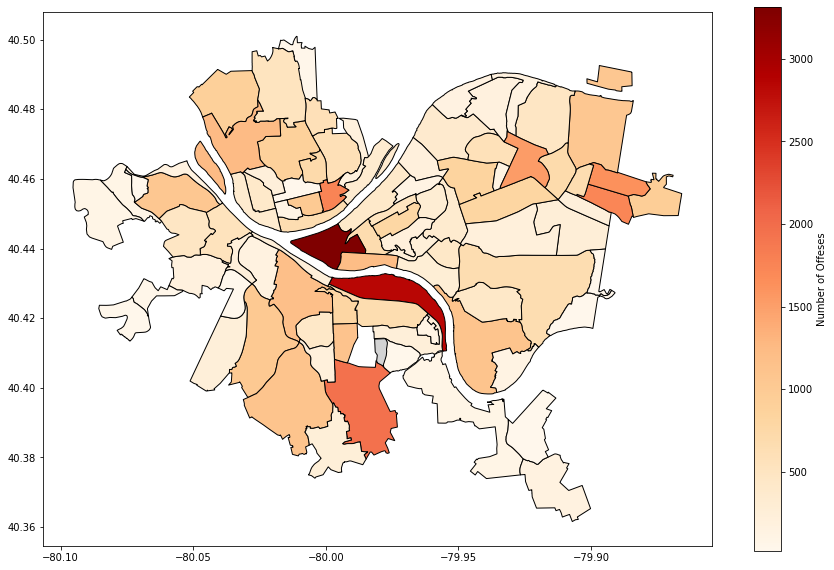

In [11]:
neighborhoods = geopandas.read_file("Pitt/Neighborhoods_.shp")
reports_map = neighborhoods.merge(hoods, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
reports_map[['hood','OFFENSES','geometry']]
reports_map.plot( column = 'OFFENSES',
                cmap='OrRd',
                edgecolor="black",
                legend=True,
                legend_kwds={'label': "Number of Offeses"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"}
                )
#reports_map.plot(column = 'INCIDENTNEIGHBORHOOD')

#reports_map[['hood','OFFENSES','geometry']]

#reports_map.plot(column='OFFENSES', cmap=plt.cm.get_cmap('RdYlGn').reversed(), edgecolor="white", legend=True, legend_kwds={'label': "Number of Incidents"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"}) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import scipy.stats as stats
%matplotlib inline

arrests = pd.read_csv("Pittsburgh Police Arrest Data.csv", usecols=['INCIDENTNEIGHBORHOOD', 'OFFENSES'])

hoods = arrests.groupby('INCIDENTNEIGHBORHOOD').count()
hoods_ordered = hoods['OFFENSES'].sort_values(ascending=True)
hoods_ordered

hoods_ordered.plot.bar(figsize = (20,10))

neighborhoods = gpd.read_file("Pitt/Neighborhoods_.shp")

reports_map = neighborhoods.merge(hoods_ordered['OFFENSES'], how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

reports_map[['hood','OFFENSES','geometry']]

reports_map.plot(column='OFFENSES', cmap=plt.cm.get_cmap('RdYlGn').reversed(), edgecolor="white", legend=True, legend_kwds={'label': "Number of Incidents"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"}) 